Alguns grupos de países tendem a ser mais avançados do que outros em relação a algum indicador ou métrica. Visando determinar qual dos blocos econômicos tendem a ser mais avançados no quesito consumo de energia renovável fizemos alguns testes de hipótese.

Primeiramente, selecionamos dois blocos econômicos para essa atividade, MERCOSUL e USMCA, também definimos, inicialmente, uma barreira para determinar se determinado país seria avançado ou atrasado, fizemos isso calculando a mediana no ano de 2019 e utilizando o resultado obtido como barreira para dividir ambos os grupos de países (avançados ou atrasados).

Ademais, utilizando o conceito de bootstrap, calculamos o intervalo de confiança de 90% para cada bloco, obtendo o valor máximo da probabilidade de ser avançado de 0.6 para o bloco MERCOSUL e 0.33 para o USMCA, o que representa que há uma chance muito maior de selecionar um país aleatório do bloco MERCOSUL e tal ser avançado do que um do USMCA.

Portanto, é possível observar, segundo os dados utilizados na análise, pela figura construída e valores obtidos que o bloco MERCOSUL é tipicamente mais avançado do que o USMCA em relação ao consumo de energia renovável sob o total.

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = pd.read_csv('dados\consumption_total_renewable_electricity.csv', skiprows=4)
df = df.set_index('Country Name')


Definindo a barreira para um país ser considerado avançado de acordo com uma divisão dos países pela mediana dos dados de 2019, e definindo os filtros para dividir os países em avançados e atrasados.

In [15]:
df_2019 = df['2019']
df_2019 = df_2019.dropna()
mediana = df_2019.median()
barreira_avancados = mediana
print(barreira_avancados)


18.51


paises_do_mercosul = ['Brazil', 'Argentina', 'Uruguay', 'Paraguay', 'Venezuela, RB']
paises_do_usmca = ['United States', 'Mexico', 'Canada']

In [16]:
paises_do_mercosul = ['Brazil', 'Argentina', 'Uruguay', 'Paraguay', 'Venezuela, RB']
paises_do_usmca = ['United States', 'Mexico', 'Canada']
paises_avancados_mercosul = []
paises_avancados_usmca = []
for pais in paises_do_mercosul:
    if df_2019.loc[pais] >= barreira_avancados:
        paises_avancados_mercosul.append(pais)
for pais in paises_do_usmca:
    if df_2019.loc[pais] >= barreira_avancados:
        paises_avancados_usmca.append(pais)

In [17]:
probabilidade_avancado_dado_mercosul = len(paises_avancados_mercosul)/len(paises_do_mercosul)
probabilidade_avancado_dado_usmca = len(paises_avancados_usmca)/len(paises_do_usmca)
print(f'A probabilidade de um país ser avançado dado que é do mercosul é igual a: {probabilidade_avancado_dado_mercosul}')
print(f'A probabilidade de um país ser avançado dado que é do umsca é igual a: {probabilidade_avancado_dado_usmca}')


A probabilidade de um país ser avançado dado que é do mercosul é igual a: 0.6
A probabilidade de um país ser avançado dado que é do umsca é igual a: 0.3333333333333333


Iniciando o bootstrap e criando as amostras de acordo com a probabilidade de ser avançado dado que pertence a certo bloco


In [43]:
amostra_mercosul = np.array([1,1,1,0,0])
amostra_usmca = np.array([1,0,0])

def reamostrar_varias_vezes(amostras, n, m):
    # Coloque sua função aqui
    medias = []
    for i in range(n):
        amostras_ = np.random.choice(amostras, size=m, replace=True)
        medias.append(np.mean(amostras_))
    return medias,np.percentile(medias, 5), np.percentile(medias, 95)

amostras_finais_mercosul, inicio_intervalo_mercosul, final_intervalo_mercosul = reamostrar_varias_vezes(amostra_mercosul, 1000, 10000)
amostras_finais_usmca, inicio_intervalo_usmca, final_intervalo_usmca = reamostrar_varias_vezes(amostra_usmca, 1000, 10000)

print(f'Intervalo do mercosul: {(inicio_intervalo_mercosul, final_intervalo_mercosul)}')
print(f'Intervalo do umsca: {(inicio_intervalo_usmca, final_intervalo_usmca)}')


amostras_finais_mercosul_confiaca = []
amostras_finais_mercosul_sem_confianca = []
for amt in amostras_finais_mercosul:
    if amt >= inicio_intervalo_mercosul and amt <= final_intervalo_mercosul:
        amostras_finais_mercosul_confiaca.append(amt)
    else:
        amostras_finais_mercosul_sem_confianca.append(amt)

amostras_finais_usmca_confianca = []
amostras_finais_usmca_fora_confianca = []
for amt in amostras_finais_usmca:
    if amt >= inicio_intervalo_usmca and amt <= final_intervalo_usmca:
        amostras_finais_usmca_confianca.append(amt)
    else:
        amostras_finais_usmca_fora_confianca.append(amt)


Intervalo do mercosul: (0.5909, 0.608)
Intervalo do umsca: (0.3259, 0.3408)


Plotando o Grafíco dos países do mercosul

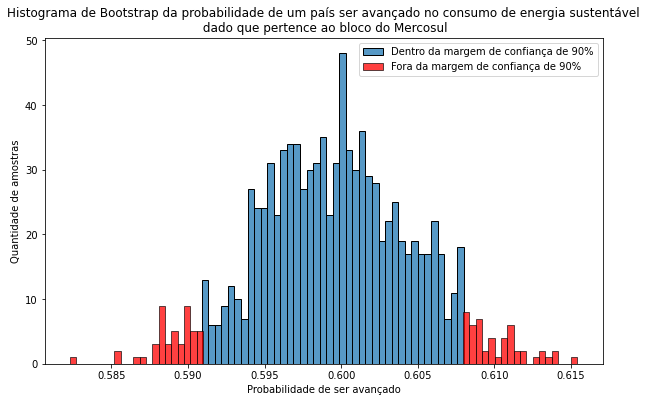

In [47]:
plt.figure(figsize=(10,6))
sns.histplot(amostras_finais_mercosul_confiaca, bins=40, label='Dentro da margem de confiança de 90%')
sns.histplot(amostras_finais_mercosul_sem_confianca, bins=80, color='r', label='Fora da margem de confiança de 90%')
plt.ylabel('Quantidade de amostras')
plt.xlabel('Probabilidade de ser avançado')
plt.title('Histograma de Bootstrap da probabilidade de um país ser avançado no consumo de energia sustentável\n dado que pertence ao bloco do Mercosul')
plt.legend()
plt.show()

Plotando o gráfico dos países do usmca

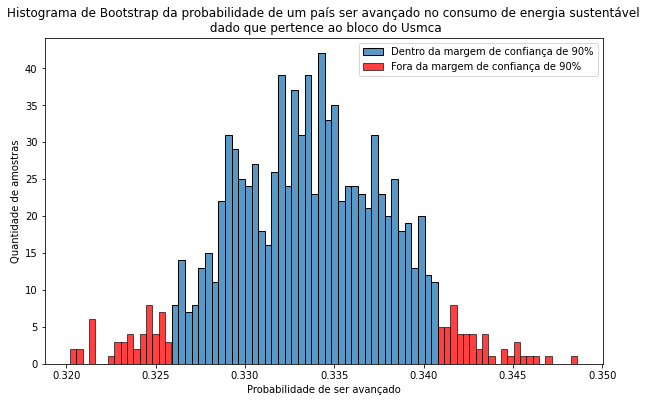

In [46]:
plt.figure(figsize=(10,6))
sns.histplot(amostras_finais_usmca_confianca, bins=40, label='Dentro da margem de confiança de 90%')
sns.histplot(amostras_finais_usmca_fora_confianca, bins=80, color='r', label='Fora da margem de confiança de 90%')
plt.ylabel('Quantidade de amostras')
plt.xlabel('Probabilidade de ser avançado')
plt.title('Histograma de Bootstrap da probabilidade de um país ser avançado no consumo de energia sustentável\n dado que pertence ao bloco do Usmca')
plt.legend()
plt.show()

É evidenciado que os países do bloco Mercosul, são típicamente mais avançados no indicador escolhido do que os países do bloco Usmca 

Pontos Corrigidos (Feedback):

APS 2

    - Correção do segundo parágrafo do texto para deixar mais evidente que falávamos da nossa hipótese e que, portanto, não era uma afirmação

    - Correção do último parágrafo utilizando melhor o conceito de correlação, dizendo que a obtida foi baixa, e não “não tão clara”.

APS 3

    - Adicionamos o código responsável por definir a barreira de avançados e atrasados
    
    - Adicionamos o código responsável por dividir entre avançados e atrasados para não ser feito manualmente

